**DataSet**:
These videos are manually classified as Fraud(F) or Benign (B) based on whether the video is promoting a fraudulent way of earning  money online or not (some of the fraudulent ways are click fraud, copy right violation and captcha filling). The description column contains the description as given by the youtuber under his/her video. The links column is list of URL links which I extracted from the description of video. classification columns is manual label that we have assigned. 
This is a small dataset, once you have done some work on this dataset, I will sent you more aswell.
italicized text




**Task**:
Your task will be to analyse the links that are extracted from description. The links can be of mobile application (like of google playstore) or of website. You should only focus of links of websites. The basic analysis you have to do is to find whether these links are harmful or not, for example do these links have any malware? or do they require user to enter sensitivities information (credit card number or phone number etc..)? You can also perform content analysis to find out useful patterns (for example common words used in sites given by Fraud video and by Benign Videos). And off-course you will have to automate the process so that it can work on any size of dataset.  
These are some preliminary ideas. You can have a look at dataset and search for articles or papers on how to find if the website links are malicious or not. We can have a meeting on Friday and discuss further. 




**Notes**:
Please note that you can use already existing libraries or tool to automate the task. You don't have to build have to build everything from scratch.
Please feel free to email me in case you have any question. 

In [6]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from urllib.parse  import urlparse
%matplotlib inline
import matplotlib.pyplot as plt


In [7]:
path = './URLListA.csv'
data=pd.read_csv(path)
data.head()

,videoId,video_url,description,links,classification
0,jc9yMaIojXc,https://www.youtube.com/watch?v=jc9yMaIojXc,Join sumonies.com by clicking here: http://sum...,"['https://sumonies.com', 'https://sumonies.com...",f
1,jqxENMKaeCU,https://www.youtube.com/watch?v=jqxENMKaeCU,We are living in exceptional times. Scientists...,"['https://www.home-2009.com', 'https://www.ppr...",b
2,0Fx9ahA0I4g,https://www.youtube.com/watch?v=0Fx9ahA0I4g,Join sumonies.com by clicking here: http://sum...,"['https://sumonies.com', 'https://sumonies.com...",f
3,LvyJTvux99s,https://www.youtube.com/watch?v=LvyJTvux99s,"When 2018 began, the Bitcoin bubble had yet to...","['https://bit.ly/thewrapytsub', 'https://bit.l...",b
4,TWls-kXR-WQ,https://www.youtube.com/watch?v=TWls-kXR-WQ,http://ucemoney.bid/8381807950519/ here is my ...,['https://ucemoney.bid/8381807950519/'],f


## There are a total of 1065 columns in the dataset provided to us.

In [8]:
print(data.columns)
len(data)

Index(['videoId', 'video_url', 'description', 'links', 'classification'], dtype='object')


1065

## Note: The descriptions are in different languages. We need to somehow cater for this in our ML part of the project.

In [9]:
data.sample(5)

,videoId,video_url,description,links,classification
528,zSpk15MZpKA,https://www.youtube.com/watch?v=zSpk15MZpKA,Personal Channel: https://www.youtube.com/chan...,['https://www.youtube.com/channel/uc_23vc8z9su...,b
702,Ypun-rCBCnU,https://www.youtube.com/watch?v=Ypun-rCBCnU,💰 My #1 Recommendation For Making Money Online...,"['https://lifewithoutlimits.co', 'https://leve...",f
918,MMhUjfF3rhM,https://www.youtube.com/watch?v=MMhUjfF3rhM,I decided to click on every AD that I saw onli...,"['https://stopad.io/y/dan', 'https://youtu.be/...",b
263,MDwKMPAx4Yw,https://www.youtube.com/watch?v=MDwKMPAx4Yw,earn money $2.to$5. ads click per day\r\r\r\nW...,"['https://2.to', 'https://www.youtube.com/chan...",f
933,nYzPyIAKeYo,https://www.youtube.com/watch?v=nYzPyIAKeYo,This is how the free video game 'Fortnite' mig...,"['https://cnb.cx/subscribecnbc', 'https://www....",b


In [10]:
# missing values
data.describe()

,videoId,video_url,description,links,classification
count,1065,1065,1041,1065,1065
unique,1065,1065,1027,844,2
top,J_wrPiNq-z8,https://www.youtube.com/watch?v=54MTj7RMi_U,https://pl.moshoppa.com/\r\r\nHow To Give Away...,[],b
freq,1,1,3,165,616


## We need to drop the indexes where the description is NULL, because these columns provide us with no useful information and will be a hinderence for our ML algorithm.

In [11]:
# missing description
print(data.description.isnull().sum())
series=data.description.isnull()
data[series].head()

24


,videoId,video_url,description,links,classification
25,KJSZrDa6_Bo,https://www.youtube.com/watch?v=KJSZrDa6_Bo,NaN,[],f
32,mvnYLDHv_rk,https://www.youtube.com/watch?v=mvnYLDHv_rk,NaN,[],f
106,UtPcLkJkups,https://www.youtube.com/watch?v=UtPcLkJkups,NaN,[],f
107,e21diKeK0FU,https://www.youtube.com/watch?v=e21diKeK0FU,NaN,[],b
117,yxw7RDgyb-M,https://www.youtube.com/watch?v=yxw7RDgyb-M,NaN,[],f


In [12]:
# droping rows which dont have links and description
new_data =data[ (data.description.notnull()) & (data.links.notnull()) ]
print('Dropped rows'  , len(data)-len(new_data))
new_data.head()

Dropped rows 24


,videoId,video_url,description,links,classification
0,jc9yMaIojXc,https://www.youtube.com/watch?v=jc9yMaIojXc,Join sumonies.com by clicking here: http://sum...,"['https://sumonies.com', 'https://sumonies.com...",f
1,jqxENMKaeCU,https://www.youtube.com/watch?v=jqxENMKaeCU,We are living in exceptional times. Scientists...,"['https://www.home-2009.com', 'https://www.ppr...",b
2,0Fx9ahA0I4g,https://www.youtube.com/watch?v=0Fx9ahA0I4g,Join sumonies.com by clicking here: http://sum...,"['https://sumonies.com', 'https://sumonies.com...",f
3,LvyJTvux99s,https://www.youtube.com/watch?v=LvyJTvux99s,"When 2018 began, the Bitcoin bubble had yet to...","['https://bit.ly/thewrapytsub', 'https://bit.l...",b
4,TWls-kXR-WQ,https://www.youtube.com/watch?v=TWls-kXR-WQ,http://ucemoney.bid/8381807950519/ here is my ...,['https://ucemoney.bid/8381807950519/'],f


## There are 141 empty slots for links. These links can be extracted from the description.

In [13]:
# missing links
series1=new_data[new_data.links=='[]']
series1['links'].count()

141

In [14]:
new_data.links= new_data['links'].str.replace("[" ,"").str.replace(" " , "").str.replace('\'',"").str.replace("]","")
new_data['links']= new_data.links.apply(lambda x: x.split(",") )
new_data.links.head()

/home/dong/.local/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/dong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    [https://sumonies.com, https://sumonies.com/?r...
1    [https://www.home-2009.com, https://www.ppr.co...
2    [https://sumonies.com, https://sumonies.com/?r...
3    [https://bit.ly/thewrapytsub, https://bit.ly/t...
4                [https://ucemoney.bid/8381807950519/]
Name: links, dtype: object

## Now that we have extracted the links from the descriptions. We need to see how many of these links are actually working. We are pinging the all the websites in the "links" column and then storing the number of working_links in a new column

In [15]:
import urllib.request

def absoulte_adress(adress):
  temp =urlparse(adress)
  if(temp.netloc=='bit.ly'): #in case of bit.ly do not remove the path
        return adress
  return temp.scheme+'://'+temp.netloc


def alive_dead(adress):
    try:
      code=urllib.request.urlopen(adress,timeout=1).getcode()
    except:
      return False
    if code==200:
      return True
    return False


def cake(lit):
  temp=set()
  for i in lit:
    lol=absoulte_adress(i)
    if alive_dead(lol):
        temp.add(lol)
  return temp

In [16]:
# below code will take a hell lot time for every link timeout is 1sec and there are 1065 records in which each row is a list of web site
# took almost 1 hour
# new_data['w_links']=new_data.links.apply(cake)
# new_data

# new_data.to_pickle('./cleaning.pkl')

# saved it in pickle module with new column w_links

## Stored the new data in cleaning.pkl

In [17]:
pickle_in = open("./cleaning.pkl","rb")
df = pickle.load(pickle_in)
df.head()

,videoId,video_url,description,links,classification,w_links
0,jc9yMaIojXc,https://www.youtube.com/watch?v=jc9yMaIojXc,Join sumonies.com by clicking here: http://sum...,"[https://sumonies.com, https://sumonies.com/?r...",f,{}
1,jqxENMKaeCU,https://www.youtube.com/watch?v=jqxENMKaeCU,We are living in exceptional times. Scientists...,"[https://www.home-2009.com, https://www.ppr.co...",b,{}
2,0Fx9ahA0I4g,https://www.youtube.com/watch?v=0Fx9ahA0I4g,Join sumonies.com by clicking here: http://sum...,"[https://sumonies.com, https://sumonies.com/?r...",f,{}
3,LvyJTvux99s,https://www.youtube.com/watch?v=LvyJTvux99s,"When 2018 began, the Bitcoin bubble had yet to...","[https://bit.ly/thewrapytsub, https://bit.ly/t...",b,{https://www.thewrap.com}
4,TWls-kXR-WQ,https://www.youtube.com/watch?v=TWls-kXR-WQ,http://ucemoney.bid/8381807950519/ here is my ...,[https://ucemoney.bid/8381807950519/],f,{}


## Bar graphs for working links that are labeled as benign vs number of working links labeled as fraudulent

Total links:  6288 
working links 1444
Length of Frame: 1041


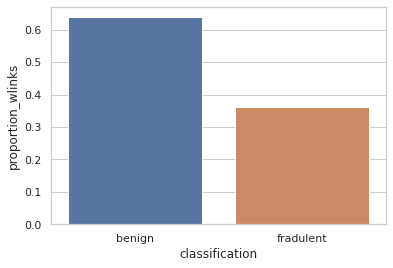

In [20]:
# total working links
working_links=sum(df.w_links.apply(lambda x: len(x)))
total_links=sum(new_data.links.apply(lambda x: len(x)))

print('Total links: ' , total_links ,'\nworking links' , working_links)
print("Length of Frame: {}".format(len(df)))

def w_links(row, classification):
    if row['classification'] == classification:
        return len(row['w_links'])
    else:
        return 0
b_working = sum(df.apply(lambda x: w_links(x, 'b'), axis=1))
f_working = sum(df.apply(lambda x: w_links(x, 'f'), axis=1))
proportion = pd.DataFrame({'classification':['benign','fradulent'], 'proportion_wlinks':[b_working/float(working_links), f_working/float(working_links)]})
numbers = pd.DataFrame({'classification':['benign','fradulent'], 'number_of_wlinks':[b_working, f_working]})
sns.set(style="whitegrid")
ax = sns.barplot(x="classification", y="proportion_wlinks", data=proportion)

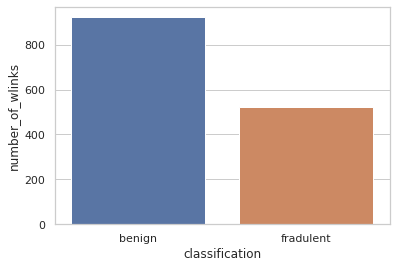

In [21]:
ax = sns.barplot(x="classification", y="number_of_wlinks", data=numbers)

## There are a total of 516 rows with working links

In [534]:
# with description and working links
df[df.w_links.apply(lambda x: True if len(x)>=1 else False)].count() 


videoId           516
video_url         516
description       516
links             516
classification    516
w_links           516
dtype: int64

### Now that we have extracted the links (from the description) and stored them in a seperate column. We need to remove them from the description! 

In [535]:
import re
regex=r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*' # for removal of links in desciption
df.description=df.description.apply(lambda x: re.sub(regex , '', x)).str.replace('\n' , ' ').str.replace('\r',' ').str.replace(r"[^a-zA-Z0-9]+", ' ')
df.description.sample(5)

156    Hello friends assalamualaikum varahmatullahi t...
609    Cardano Update Perhaps Ethereum s biggest comp...
426    In this video Yogeshwar Vashishtha does the fu...
490    Stock Market Updates and News 8th October 2018...
791    Affiliate Marketing For Beginners The Future O...
Name: description, dtype: object

In [32]:
df.head()

,videoId,video_url,description,links,classification,w_links
0,jc9yMaIojXc,https://www.youtube.com/watch?v=jc9yMaIojXc,Join sumonies.com by clicking here: http://sum...,"[https://sumonies.com, https://sumonies.com/?r...",f,{}
1,jqxENMKaeCU,https://www.youtube.com/watch?v=jqxENMKaeCU,We are living in exceptional times. Scientists...,"[https://www.home-2009.com, https://www.ppr.co...",b,{}
2,0Fx9ahA0I4g,https://www.youtube.com/watch?v=0Fx9ahA0I4g,Join sumonies.com by clicking here: http://sum...,"[https://sumonies.com, https://sumonies.com/?r...",f,{}
3,LvyJTvux99s,https://www.youtube.com/watch?v=LvyJTvux99s,"When 2018 began, the Bitcoin bubble had yet to...","[https://bit.ly/thewrapytsub, https://bit.ly/t...",b,{https://www.thewrap.com}
4,TWls-kXR-WQ,https://www.youtube.com/watch?v=TWls-kXR-WQ,http://ucemoney.bid/8381807950519/ here is my ...,[https://ucemoney.bid/8381807950519/],f,{}


## Making a new column to store number of links that are down. Our updated data set has:
    -videold
    -video_url
    -description
    -links
    -classification
    -w_links
    -closed_links

In [649]:
len(df.loc[0,'links'])
#len(df.loc[0,'w_links'])

w_links_count = df['w_links'].apply(lambda x: len(x))
links_count = df.links.apply(lambda x: len(x))


df['closed_links'] = links_count - w_links_count


### We are using TF-IDF vectorizer. First, we thought of using Count-Vectorizer but that did not take into account the misinformation provided by stop words. Because tf-idf penalizes these words being repeated in all the descriptions, it seemed like a better fit.

In [985]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
descriptionArray = np.array(df['description'])
vectorizer = TfidfVectorizer()
independentVar = vectorizer.fit_transform(descriptionArray)
independentVarT = independentVar

### Our target variable is taking value 1 for fraudulent websites and 0 otherwise.

In [986]:
#Fraudulent is represented by 1 while benign is represented by 0
target = df['classification'].apply(lambda x : 1 if x=='f' else 0)
target = np.array(target)
target

array([1, 0, 1, ..., 0, 0, 0])

## Model 1:
- In this model we are using tf-idf vectorizer and the features will be the words in the description. The initial split will 70:30 for train_test. Then we will be running 3-fold logistic regression.

In [987]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independentVar, target, test_size = 0.30)

In [988]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 3, solver='liblinear').fit(x_train, y_train)

### The huge difference in the training and test data implies overfitting. So we need to re-think our model!

In [989]:
accuracyTest = clf.score(x_test, y_test)
accuracyTrain = clf.score(x_train, y_train)

print("The accuracy score on test data is : {}".format(clf.score(x_test, y_test)))
print("The accuracy score on train data is : {}".format(clf.score(x_train, y_train)))

The accuracy score on test data is : 0.8242811501597445
The accuracy score on train data is : 0.9931318681318682


# Model 2
- We will be selecting the best 940 features(words with highest tf-idf score).
- Moreover, we are also adding the number of closed links as another features. This adds up the total number of features to 941. The basic idea behind adding this feature is that, a lot of fradulent links are not working or have been taken down. On the other hand, a lot of benign links are still working. As our data_set is out-dated this assumption makes perfect sense.

In [990]:
closedLinksArray = [[i] for i in df.closed_links]
selector = SelectKBest(score_func=chi2, k=940)
f = selector.fit(independentVar, target)
independentVar = f.transform(independentVar)

X = np.append(independentVar.toarray(),closedLinksArray, axis = 1)

# independentVar.toarray()
# closedLinksArray
X

array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 4.],
       [0., 0., 0., ..., 0., 0., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 3.]])

In [991]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, target, test_size=0.30)

In [992]:
clfWithExtraFeature = LogisticRegressionCV(solver='saga').fit(X_TRAIN, Y_TRAIN)

/home/dong/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/dong/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dong/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dong/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dong/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: Conve

## Comparison of Models
- Eventhough Model-1 is perdorming a lot better in terms of accuracy on the traning set, there is a huge difference of accuracies in train and test set. Which has happened due to overfitting. So this model can't be used for further analysis!
- Model-2 is has a minute difference in test and train data accuracies. So this model has solved the problem of overfitting and is performing well on the given information


In [993]:
accuracyTestExtra = clfWithExtraFeature.score(X_TEST,Y_TEST)
accuracyTrainExtra = clfWithExtraFeature.score(X_TRAIN,Y_TRAIN)
print("The accuracy without the number of closed website links for the Training set is {} ".format(accuracyTrain))
print("The accuracy without the number of closed website links for the Test set is {} ".format(accuracyTest))
print('---------------------------------------------------------------------------------------------------------------')
print("The accuracy with the number of closed website links for the Training set is {} ".format(accuracyTrainExtra))
print("The accuracy with the number of closed website links for the Test set is {} ".format(accuracyTestExtra))

The accuracy without the number of closed website links for the Training set is 0.9931318681318682 
The accuracy without the number of closed website links for the Test set is 0.8242811501597445 
---------------------------------------------------------------------------------------------------------------
The accuracy with the number of closed website links for the Training set is 0.8447802197802198 
The accuracy with the number of closed website links for the Test set is 0.8210862619808307 


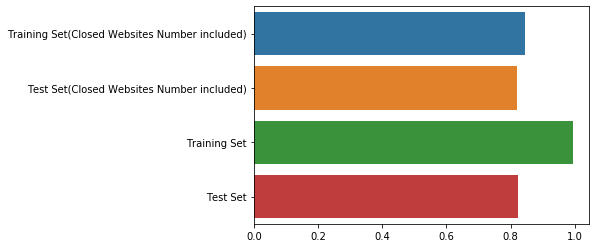

In [994]:
sets = ['Training Set(Closed Websites Number included)','Test Set(Closed Websites Number included)','Training Set','Test Set']
accuracies = [accuracyTrainExtra,accuracyTestExtra, accuracyTrain, accuracyTest]
sns.barplot(y = sets,x = accuracies)

In [995]:
Y = clf.predict(independentVarT)
YwithClosedSite = clfWithExtraFeature.predict(X)

In [996]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target, YwithClosedSite)
matSim = confusion_matrix(target, Y)
print("Non - Normalized Confusion Matrix using Closed links count\n {}".format(mat))
print("Non - Normalized Confusion Matrix without using Closed links count\n {}".format(matSim))

Non - Normalized Confusion Matrix using Closed links count
 [[569  33]
 [136 303]]
Non - Normalized Confusion Matrix without using Closed links count
 [[581  21]
 [ 39 400]]


# For a better understanding, confusion Matrices for both the models(being tested on the complete data) are drawn below.

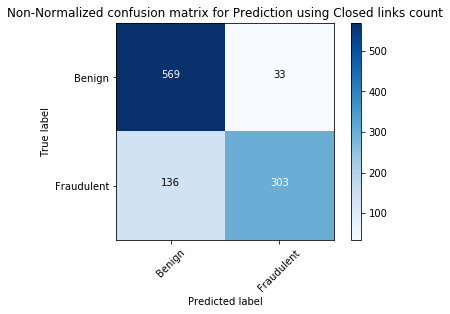

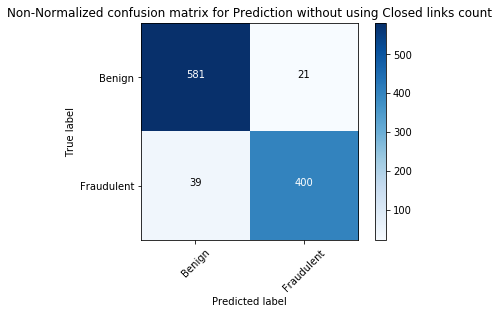

In [997]:


import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`. From
    sklearn official documentation
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(mat,classes=['Benign','Fraudulent'], normalize=False,
                      title='Non-Normalized confusion matrix for Prediction using Closed links count')


plot_confusion_matrix(matSim,classes=['Benign','Fraudulent'], normalize=False,
                      title='Non-Normalized confusion matrix for Prediction without using Closed links count')
